<h1 style="text-align:center;color:yellow;font-size:50px;font-family:ALGERIAN;border:solid">Projet de Machine Learning</h1>

<h1 style="text-align:center;color:yellow;font-size:50px;font-family:times">Ecole Nationale de la Statistique et de l'Analyse Economique Pierre NDIAYE (ENSAE)</h1><br>

<div style="display:flex;text-align:justify">
    
    
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle; width:60%"> 
<span style="font-weight:bold">Réalisé par : </span> 
    <ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle"> 
        <li>KPAKOU M'Mounéné</li>                                      
        <li>SANGARE Gnalen</li>
        <li>Moussa Mahammadou Oumar Farouk</li>                                      
        <li>ADAM Alassane</li>
    </ul>
    <span style="font-style: italic;font-size:13px">Élèves Ingénieurs Statisticiens Economistes</span>
</ul>
 
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:none;width:39%"> 
 <li style="font-weight:bold">Sous la supervision de :</li> 
 <li>Mme. Mously DIAW</li>                                     
   
</ul>
    
</div>   

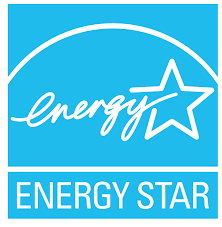

<h3 style="text-align:justify;color:yellow;font-size:26px;font-family:Georgia"> A. Définition de l'environnement de travail</h3>

In [1]:
from pathlib import Path

HOME_DIR = Path.cwd().parent
print(f"Home directory: {HOME_DIR}")

# Le répertoire des données
DATA_DIR = Path(HOME_DIR, "Data")
print(f"Data directory: {DATA_DIR}")


Home directory: c:\Users\LENOVO\Desktop\KPAM ISE 2\Machine learning 1\Projet_ML
Data directory: c:\Users\LENOVO\Desktop\KPAM ISE 2\Machine learning 1\Projet_ML\Data


<h3 style="text-align:justify;color:yellow;font-size:26px;font-family:Georgia">B. Importation des packages</h3>

In [2]:
import numpy as np
import pandas as pd
# Modèles
from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.base import clone
from sklearn.compose import make_column_selector as selector

# Métrics
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.utils import check_array

# Cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
data = pd.read_csv(Path(DATA_DIR, "data_clean.csv"))
data = data.drop('OSEBuildingID', axis = 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1658 non-null   object 
 1   Neighborhood                     1658 non-null   object 
 2   BuildingAge                      1658 non-null   int64  
 3   NumberofBuildings                1658 non-null   float64
 4   NumberofFloors                   1658 non-null   int64  
 5   PropertyGFAParking               1658 non-null   int64  
 6   PropertyGFABuilding(s)           1658 non-null   int64  
 7   PrimaryProperty                  1658 non-null   object 
 8   LargestPropertyUseTypeGFA        1658 non-null   float64
 9   SecondLargest                    1658 non-null   object 
 10  SecondLargestPropertyUseTypeGFA  852 non-null    float64
 11  ThirdLargest                     1658 non-null   object 
 12  ThirdLargestProperty

Selection des variables catégorielles et numériques

In [4]:
# Sélection colonnes catégorielles
df_cat = data.select_dtypes(include=['object']).columns.tolist()

# Sélectioncolonnes numériques
df_num = data.select_dtypes(exclude=['object']).columns.tolist()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1658 non-null   object 
 1   Neighborhood                     1658 non-null   object 
 2   BuildingAge                      1658 non-null   int64  
 3   NumberofBuildings                1658 non-null   float64
 4   NumberofFloors                   1658 non-null   int64  
 5   PropertyGFAParking               1658 non-null   int64  
 6   PropertyGFABuilding(s)           1658 non-null   int64  
 7   PrimaryProperty                  1658 non-null   object 
 8   LargestPropertyUseTypeGFA        1658 non-null   float64
 9   SecondLargest                    1658 non-null   object 
 10  SecondLargestPropertyUseTypeGFA  852 non-null    float64
 11  ThirdLargest                     1658 non-null   object 
 12  ThirdLargestProperty

<h1 style="text-align:justify;color:yellow;font-size:30px;font-family:Georgia">C. Modelisation</h1>

Dans cette partie nous allons d'abord definir des fonctions nous permettant d'effectuer la modélisation.Nous utilisons pplusieurs modèles notamment les modèles linéaires et non linéaires et nous selectionnerons le meilleur modèle afin d'effectuer la prédiction 

## Definition des piplines

In [5]:
import category_encoders
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_selector as selector
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from category_encoders.target_encoder import TargetEncoder
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

### Pipeline pour les variables quantitatives

Nous allons appliquer la transformation logarithmique pour les variables numeriques et le onehot encoder pour les variables categorielles

In [6]:


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Inputation des valeurs manquantes
    ('log_transform', FunctionTransformer(func=np.log1p)),  # Transformation log optionnelle
    ('std_scaler', StandardScaler()),  # Normalisation des données
])


### Pipeline pour les variables qualitatives

In [7]:
# Pipeline pour les variables catégorielles
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NotApplicable')),  # Inputation des valeurs manquantes
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

### Pipeline des transformations globales

In [8]:
# Labelize les variables catégorielles et les ajoute aux variables numériques transformés
full_pipeline = ColumnTransformer([
        ("num", num_pipeline,  selector(dtype_exclude="object")),
        ("cat", cat_pipeline,  selector(dtype_include="object"))
    ])
## Avec EnergyScore
full_pipeline_est = ColumnTransformer([
        ("num", num_pipeline,  selector(dtype_exclude="object")),
        ("cat", cat_pipeline,  selector(dtype_include="object"))
    ])

In [9]:
def define_pipeline(regressor, energyscore = False) :
    if energyscore :
        # Assembly of preprocessor and regressor
        pipe = Pipeline([("preprocess", full_pipeline_est),
                    ("regressor", regressor)
                    ])
    else :
        # Assembly of preprocessor and regressor
        pipe = Pipeline([("preprocess", full_pipeline),
                    ("regressor", regressor)
                    ])
    return pipe

### Echantillon Train & Test

#### Sans EnergyStarScore 

In [10]:

# X est la liste des variables explicatives et y est la variable cible
X_index = data.columns[~data.columns.isin(["SiteEnergyUse(kBtu)", "ENERGYSTARScore"])] # Récupérer les colonnes différentes de "SiteEnergyUse(kBtu) et ENERGYSTARScore"
y_index = data.columns == "SiteEnergyUse(kBtu)"  # Récupérer la colonne "SiteEnergyUse(kBtu)"

X = data[X_index]
y = data.iloc[:, y_index]

In [11]:

# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
y_train, y_test = np.log1p(y_train), np.log1p(y_test)

#### Avec EnergyStarScore

In [12]:
# Création des variables explicatives et cible:
X_est = data.loc[data['ENERGYSTARScore'].notnull(), df_cat+ df_num[1:-1]]  
y_est = data.loc[data['ENERGYSTARScore'].notnull(), 'SiteEnergyUse(kBtu)']

In [13]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_est_train, X_est_test, y_est_train, y_est_test = train_test_split(X_est, y_est, test_size=0.30, random_state=42)
y_est_train, y_est_test = np.log1p(y_est_train), np.log1p(y_est_test)


## Définitions des fonctions 

La fonction get_all_performances nous permet d'afficher les performances du modèles. Nous utiliserons plusieurs métriques.

In [14]:
def get_all_performances(value_train: tuple,
                         values_test: tuple,
                         metrics: list,
                        ) -> pd.DataFrame:
   
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

In [15]:
METRICS = [metrics.r2_score,
           metrics.mean_squared_error,
           metrics.mean_absolute_percentage_error,
           metrics.max_error,
          ]

### Fonction d'implementation de modèle

In [16]:
def train_model(model, x_train, y_train, x_test, y_test):
    # On entraîne ce modèle sur les données d'entrainement
    # Conversion en 1D si y_train ou y_test est un DataFrame
    y_train = y_train.values.ravel() if hasattr(y_train, "values") else y_train
    y_test = y_test.values.ravel() if hasattr(y_test, "values") else y_test
    model.fit(x_train, y_train)
    
    error_train = np.mean((model.predict(x_train) - y_train) ** 2)
    error_test = np.mean((model.predict(x_test) - y_test) ** 2)

    # On obtient l'erreur quadratique ci-dessous
    print(f"Model error: {round(error_test, 5)}")
    return {"estimator": model, "error_train": error_train, "error_test": error_test}

### Function Comparaison des résultats avec ENERGIESTARSCORE ET SANS 

In [17]:
def compare_all_performances(train_test_data_1: dict, 
                             train_test_data_2: dict,
                             metrics: list,
                             labels: tuple=("Sans EnergyStarScore", "Avec EnergyStarScore")) -> pd.DataFrame:
    """
    Compare les performances des modèles dans deux configurations (avec et sans EnergyStarScore).

        pd.DataFrame: Un DataFrame contenant les performances des deux modèles pour chaque métrique.
    """
    # Récupérer les performances pour le premier ensemble de données
    perfs_1 = get_all_performances(value_train=train_test_data_1["train"],
                                   values_test=train_test_data_1["test"],
                                   metrics=metrics)
    
    # Récupérer les performances pour le second ensemble de données
    perfs_2 = get_all_performances(value_train=train_test_data_2["train"],
                                   values_test=train_test_data_2["test"],
                                   metrics=metrics)
    
    # Renommer les colonnes pour inclure les labels (facilite la comparaison)
    perfs_1.rename(columns={"train": f"train_{labels[0]}", "test": f"test_{labels[0]}"}, inplace=True)
    perfs_2.rename(columns={"train": f"train_{labels[1]}", "test": f"test_{labels[1]}"}, inplace=True)
    
    # Fusionner les deux DataFrames sur la colonne 'metric'
    comparison = perfs_1.merge(perfs_2, on="metric")
    
    return comparison


### Fonction d'optimisation des hyperparamètres

In [18]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator

def optimize_and_evaluate(model,
                          param_grid: dict,
                          X_train: pd.DataFrame,
                          y_train: pd.Series,
                          X_test: pd.DataFrame,
                          y_test: pd.Series,
                          metrics: list,
                          search_method: str = 'grid',
                          n_iter: int = 10,
                          cv: int = 5) -> pd.DataFrame:
  

    # Choose the search method
    if search_method == 'grid':
        search = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, verbose=2)
    elif search_method == 'random':
        search = RandomizedSearchCV(model, param_grid, n_iter=n_iter, cv=cv, n_jobs=-1, verbose=2, random_state=42)
    else:
        raise ValueError("search_method must be 'grid' or 'random'")

    # Perform the search
    search.fit(X_train, y_train)
    #best parameters
    #print("Best parameters found: ", search.best_params_)
    best_param=search.best_params_
    # Get the best model
    best_model = search.best_estimator_

    # Evaluate the best model
    value_train = (y_train, best_model.predict(X_train))
    values_test = (y_test, best_model.predict(X_test))
    #best score
    best_scores=search.best_score_
    # Get all performances
    performances = get_all_performances(value_train, values_test, metrics=METRICS)

    return performances, best_model,best_param,best_scores



### Features importances functions

Pour les modèles linéaires

In [19]:

def display_feature_importance(best_model, X):
    import matplotlib.pyplot as plt
    import seaborn as sns
    # Extraire les coefficients du meilleur modèle
    final_estimator_name = list(best_model.named_steps.keys())[-1]
    model = best_model.named_steps[final_estimator_name]
    Coefficients = model.coef_
    # Obtenir les noms des caractéristiques après transformation
    num_features = best_model.named_steps['preprocessor'].transformers_[0][1].named_steps['std_scaler'].get_feature_names_out(input_features=X.select_dtypes(exclude='object').columns)
    cat_features = best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(input_features=X.select_dtypes(include='object').columns)

    # Combiner les noms des caractéristiques
    feature_names = np.concatenate([num_features, cat_features])

    # Sélectionner les caractéristiques avec des coefficients non nuls
    selected_features= feature_names[Coefficients != 0]

    # Créez un DataFrame pour afficher les résultats
    coefficients_df = pd.DataFrame({
        'Feature': selected_features,
        'Coefficient': Coefficients[Coefficients != 0]
    })

    # Représenter graphiquement les coefficients
    coefficients_df_sorted = coefficients_df.sort_values("Coefficient", key=lambda v: abs(v), ascending=False)

    # Tracer le graphique
    plt.figure(figsize=(10, 7))
    sns.barplot(x='Coefficient', y='Feature', data=coefficients_df_sorted, palette='viridis')
    plt.title("Importance des variables dans le modèle optimisé")
    plt.axvline(x=0, color='.6')
    plt.show()


Pour les modèles non lineaires

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def display_feature_importance_2(best_model, X):
    # Récupérer le nom de l'estimateur final
    final_estimator_name = list(best_model.named_steps.keys())[-1]
    model = best_model.named_steps[final_estimator_name]

    # Extraire les importances ou les coefficients du modèle
    if final_estimator_name in ['rfregressor', 'xgregressor']:
        importances = model.feature_importances_
    elif final_estimator_name == 'svregressor':
        importances = model.coef_[0]
    else:
        raise ValueError(f"Model {final_estimator_name} is not supported.")

    # Obtenir les noms des caractéristiques après transformation
    num_features = best_model.named_steps['preprocessor'].transformers_[0][1].named_steps['std_scaler'].get_feature_names_out(input_features=X.select_dtypes(exclude='object').columns)
    cat_features = best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(input_features=X.select_dtypes(include='object').columns)

    # Combiner les noms des caractéristiques
    feature_names = np.concatenate([num_features, cat_features])

    # Créer un DataFrame pour afficher les résultats
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Trier les caractéristiques par ordre d'importance décroissante
    importance_df_sorted = importance_df.sort_values("Importance", key=lambda v: abs(v), ascending=False)

    # Afficher les caractéristiques sélectionnées et leurs importances
    print(importance_df_sorted)

    # Représenter graphiquement les importances
    plt.figure(figsize=(10, 7))
    sns.barplot(x='Importance', y='Feature', data=importance_df_sorted, palette='viridis')
    plt.title("Importance des variables dans le modèle optimisé")
    plt.xlabel('Importance')
    plt.ylabel('Variable')
    plt.axvline(x=0, color='.6')
    plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 17px; color: RGB(51,165,182); "> 1-Modèle baseline: Regression linéaire </h3>
</div>

Dans cette partie , nous allons créer un modèle baseline pour évaluer les performances de nos futurs modèles et vérifier qu'ils améliore les prédictions. Pour cette baseline, nous utiliserons une régression linéaire multivariée.

### Pipeline du modèle linéaire

In [21]:
# définition de Pipeline de régression avec Pipeline 
set_config(display="diagram", print_changed_only=True)
# Sans Energy star score
reg_pipe = define_pipeline(linear_model.LinearRegression())
# Avec Energy star score
reg_pipe_est = define_pipeline(linear_model.LinearRegression(), energyscore = True)
reg_pipe_est

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D2F5D65D0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NotApplicable',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D4FEF5B50>)])),
                ('regressor', LinearRegression())])

### Entrainement du modèle sans énergie score

In [22]:
# Train linear model sans energyscore
lr_results = train_model(model=reg_pipe,
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)
lr_pipe = lr_results["estimator"]

Model error: 0.46071


In [23]:
# get performances in train & test (Sans EnergyStarScore)
get_all_performances(value_train=(y_train, lr_pipe.predict(X_train)),
                     values_test=(y_test, lr_pipe.predict(X_test)),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,0.711154,0.721303
1,mean_squared_error,0.513144,0.460712
2,mean_absolute_percentage_error,0.036250,0.035144
3,max_error,4.236545,2.561701


### Entrainement du modèle avec énergie score

In [24]:
# Train linear model avec energyscore
lr_results_est = train_model(model=reg_pipe_est,
                       x_train=X_est_train, y_train=y_est_train,
                       x_test=X_est_test, y_test=y_est_test)

lr_pipe_est = lr_results_est["estimator"]

Model error: 0.27068


On constate que l'erreur du modèle a diminué avec l'ajout de Energiestarscore

In [25]:
# get performances in train & test (Avec EnergyStarScore)
get_all_performances(value_train=(y_est_train, lr_pipe_est.predict(X_est_train)),
                     values_test=(y_est_test, lr_pipe_est.predict(X_est_test)),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,0.857607,0.839438
1,mean_squared_error,0.232223,0.270676
2,mean_absolute_percentage_error,0.023078,0.025711
3,max_error,3.266739,2.114290


In [26]:
# Appel de la fonction de comparaison
comparison_df = compare_all_performances(
    train_test_data_1={"train": (y_train, lr_pipe.predict(X_train)),
                       "test": (y_test, lr_pipe.predict(X_test))},
    train_test_data_2={"train": (y_est_train, lr_pipe_est.predict(X_est_train)),
                       "test": (y_est_test, lr_pipe_est.predict(X_est_test))},
    metrics=METRICS,
    labels=("Sans_EnergyStarScore", "Avec_EnergyStarScore")
)

comparison_df


,metric,train_Sans_EnergyStarScore,test_Sans_EnergyStarScore,train_Avec_EnergyStarScore,test_Avec_EnergyStarScore
0,r2_score,0.711154,0.721303,0.857607,0.839438
1,mean_squared_error,0.513144,0.460712,0.232223,0.270676
2,mean_absolute_percentage_error,0.036250,0.035144,0.023078,0.025711
3,max_error,4.236545,2.561701,3.266739,2.114290


On observe une nette augmentation de la performance du modèle à l'entrainement qu'au Test et une diminution des erreurs avec l'ajout de la variable ENERGIESTARSCORE

### Vérifications des hypothèses de la regression linéaire

In [27]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
#Prédictions sur le jeu de test
y_test_pred = lr_pipe_est.predict(X_est_test)

# Calcul des résidus
residuals = y_est_test - y_test_pred
# Ajout d'une constante pour le modèle (nécessaire pour statsmodels)
X_est_test_transformed = lr_pipe_est.named_steps["preprocess"].transform(X_est_test)
# Convertir la matrice sparse en dense
X_est_test_dense = X_est_test_transformed.toarray() 
X_test_with_constant = sm.add_constant(X_est_test_dense)


### Normalité des residus

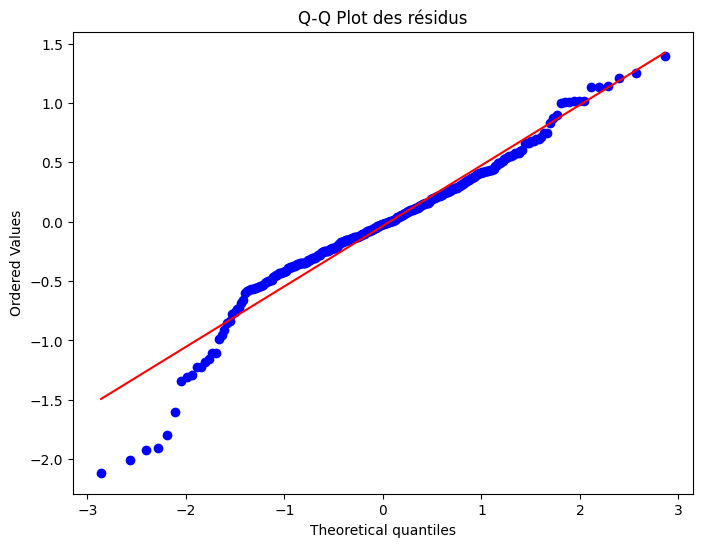

In [28]:
from scipy.stats import probplot
plt.figure(figsize=(8, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot des résidus")
plt.show()

####  Test de Shapiro-Wilk

In [29]:
from scipy.stats import shapiro

# Test de Shapiro-Wilk
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: p-value = {p_value:.4f}")

if p_value > 0.05:
    print("Les résidus suivent une distribution normale (p > 0.05).")
else:
    print("Les résidus ne suivent pas une distribution normale (p <= 0.05).")


Shapiro-Wilk Test: p-value = 0.0000
Les résidus ne suivent pas une distribution normale (p <= 0.05).


#### Vérification de l’homoscedasticité

In [30]:
import statsmodels.stats.api as sms

# Test de Breusch-Pagan
_, p_value, _, _ = sms.het_breuschpagan(residuals, X_test_with_constant)
print(f"Breusch-Pagan Test: p-value = {p_value:.4f}")

if p_value > 0.05:
    print("Pas de preuve d'hétéroscédasticité (p > 0.05).")
else:
    print("Présence d'hétéroscédasticité (p <= 0.05).")


Breusch-Pagan Test: p-value = 0.2181
Pas de preuve d'hétéroscédasticité (p > 0.05).


### Vérification de l’absence de multicolinéarité

La multicolinéarité se produit lorsque les variables indépendantes sont trop fortement corrélées entre elles.

Le facteur d'inflation de la variance VIF* identifie la corrélation entre les variables indépendantes et la force de cette corrélation. [Si VIF >1 & VIF <5 corrélation modérée, VIF > 5 niveau critique de multicollinéarité.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcul des VIF pour chaque variable explicative
X_train_numeric = X_est_train.select_dtypes(include=[float, int])
X_train_numeric = X_train_numeric.replace([np.inf, -np.inf], np.nan).dropna()
# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

print(vif_data)

                           Feature        VIF
0                NumberofBuildings  14.306182
1                   NumberofFloors   7.339495
2               PropertyGFAParking   2.548630
3           PropertyGFABuilding(s)  14.843272
4        LargestPropertyUseTypeGFA  19.268248
5  SecondLargestPropertyUseTypeGFA   8.230290
6   ThirdLargestPropertyUseTypeGFA   3.416579
7            NumberPropertyUseType   9.247255
8               harvesine_distance   2.375212
9                  ENERGYSTARScore   9.013351


`NumberofBuildings` (VIF = 14.31), `PropertyGFABuilding`(s) (VIF = 14.84) et `LargestPropertyUseTypeGFA` (VIF = 19.27) ont des VIF très élevés. Ces variables sont probablement très corrélées avec d'autres variables dans le modèle, ce qui peut nuire à la précision des coefficients.

Nous allons tester d'autres modèles

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 17px; color: RGB(51,165,182); ">2-Regression Lasso</h3>
</div>

In [32]:
# définition de Pipeline de régression avec Pipeline (c'est à nous de données les noms de chaque étape du workflow)
set_config(display="diagram", print_changed_only=True)
# Sans Energy star score
lasso_pipe = define_pipeline(linear_model.Lasso(fit_intercept=True, alpha=1.,))
# Avec
lasso_pipe_est = define_pipeline(linear_model.Lasso(fit_intercept=True, alpha=1.,), energyscore = True)
lasso_pipe_est

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D2F5D65D0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NotApplicable',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D4FEF5B50>)])),
                ('regressor', Lasso())])

# Sans validation croisée

In [33]:
# Train linear model sans energyscore
lr_results = train_model(model=lasso_pipe,
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)

pipe_lasso = lr_results["estimator"]

Model error: 1.65414


In [34]:
# Train linear model avec energyscore
lr_results_est = train_model(model=lasso_pipe_est,
                       x_train=X_est_train, y_train=y_est_train,
                       x_test=X_est_test, y_test=y_est_test)

pipe_lasso_est = lr_results_est["estimator"]

Model error: 1.68586


In [35]:
# Appel de la fonction de comparaison
comparison_df = compare_all_performances(
    train_test_data_1={"train": (y_train, pipe_lasso.predict(X_train)),
                       "test": (y_test, pipe_lasso.predict(X_test))},
    train_test_data_2={"train": (y_est_train, pipe_lasso_est.predict(X_est_train)),
                       "test": (y_est_test, pipe_lasso_est.predict(X_est_test))},
    metrics=METRICS,
    labels=("Sans_EnergyStarScore", "Avec_EnergyStarScore")
)

comparison_df

,metric,train_Sans_EnergyStarScore,test_Sans_EnergyStarScore,train_Avec_EnergyStarScore,test_Avec_EnergyStarScore
0,r2_score,0.000000,-0.000633,0.000000,-0.000029
1,mean_squared_error,1.776532,1.654136,1.630852,1.685856
2,mean_absolute_percentage_error,0.070217,0.069566,0.068650,0.068675
3,max_error,5.682680,3.875485,4.971501,4.546330


#  AVEC VALIDATION CROISEE ET OPTIMISATION DES HYPERPARAMTRES

### SANS ENERGIESTARScore

In [36]:
param_grid = {
    "lasso__alpha": [0.00001, 0.0001, 0.001, 0.002, 0.003, 0.01, 0.011, 0.012, 0.013,0.14, 0.015, 0.016, 
                         0.017, 0.018, 0.019, 0.02, 0.025, 0.03,0.1,0.25,0.5,0.8,1.0],
    "lasso__fit_intercept" : [True, False]
}


In [37]:
from sklearn.linear_model import Lasso
lass_pipe = Pipeline([
        ("preprocessor", full_pipeline),
        ('lasso', Lasso())

    ])

In [38]:
#Sans  ENERGIESTARSCore

performances, lasso_best_model,lasso_best_param,lasso_best_scores = optimize_and_evaluate(
    model=lass_pipe,
    param_grid=param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    metrics=METRICS
)
performances
lasso_best_scores

Fitting 5 folds for each of 46 candidates, totalling 230 fits


np.float64(0.6810001803693788)

### AVEC ENERGIESTARSCORE

In [39]:
lass_pipe_est = Pipeline([
        ("preprocessor", full_pipeline_est),
        ('lasso', Lasso())

    ])

In [40]:
#Avec EnergieStarscore

performances_with, lasso_best_model_With,lasso_best_param_with,lasso_best_scores_with = optimize_and_evaluate(
    model=lass_pipe_est,
    param_grid=param_grid,
    X_train=X_est_train,
    y_train=y_est_train,
    X_test=X_est_test,
    y_test=y_est_test,
    metrics=METRICS
)
performances_with
lasso_best_scores_with

Fitting 5 folds for each of 46 candidates, totalling 230 fits


np.float64(0.8345881747134358)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 17px; color: RGB(51,165,182); ">3-Regression Ridge</h3>
</div>

In [41]:
# définition de Pipeline de régression avec Pipeline (c'est à nous de données les noms de chaque étape du workflow)
set_config(display="diagram", print_changed_only=True)
# Sans Energy star score
ridge_pipe = define_pipeline(linear_model.Ridge(fit_intercept=True, alpha=1.,))
# Avec
ridge_pipe_est = define_pipeline(linear_model.Ridge(fit_intercept=True, alpha=1.,), energyscore = True)
ridge_pipe_est

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D2F5D65D0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NotApplicable',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D4FEF5B50>)])),
                ('regressor', Ridge())])

# Sans validation croisée

In [42]:
# Train linear model sans energyscore
lr_results = train_model(model=ridge_pipe,
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)

pipe_ridge = lr_results["estimator"]

Model error: 0.45843


In [43]:
# Train linear model avec energyscore
lr_results_est = train_model(model=ridge_pipe_est,
                       x_train=X_est_train, y_train=y_est_train,
                       x_test=X_est_test, y_test=y_est_test)

pipe_ridge_est = lr_results_est["estimator"]

Model error: 0.26818


In [44]:
# Appel de la fonction de comparaison
comparison_df = compare_all_performances(
    train_test_data_1={"train": (y_train, pipe_ridge.predict(X_train)),
                       "test": (y_test, pipe_ridge.predict(X_test))},
    train_test_data_2={"train": (y_est_train, pipe_ridge_est.predict(X_est_train)),
                       "test": (y_est_test, pipe_ridge_est.predict(X_est_test))},
    metrics=METRICS,
    labels=("Sans_EnergyStarScore", "Avec_EnergyStarScore")
)

comparison_df

,metric,train_Sans_EnergyStarScore,test_Sans_EnergyStarScore,train_Avec_EnergyStarScore,test_Avec_EnergyStarScore
0,r2_score,0.711077,0.722682,0.857418,0.840916
1,mean_squared_error,0.513282,0.458431,0.232531,0.268185
2,mean_absolute_percentage_error,0.036229,0.035050,0.023089,0.025428
3,max_error,4.241984,2.556929,3.261565,2.131380


#  AVEC VALIDATION CROISEE ET OPTIMISATION DES HYPERPARAMTRES

### SANS ENERGIESTARScore

In [45]:
param_grid = {
    "ridge__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Régularisation
    "ridge__solver": ["auto", "saga", "lsqr", "cholesky"], # Solvers
    "ridge__tol": [1e-3, 1e-4, 1e-5],                     # Tolérance
    "ridge__max_iter": [1000, 5000, 10000]                # Maximum d'itérations
}

In [46]:
from sklearn.linear_model import Ridge
ridg_pipe = Pipeline([
        ("preprocessor", full_pipeline),
        ('ridge', Ridge())

    ])

In [47]:
#Sans  ENERGIESTARSCore

performances, ridge_best_model,ridge_best_param,ridge_best_scores = optimize_and_evaluate(
    model=ridg_pipe,
    param_grid=param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    metrics=METRICS
)

lasso_best_scores

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
630 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
315 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python31

np.float64(0.6810001803693788)

### AVEC ENERGIESTARSCORE

In [48]:
ridg_pipe_est = Pipeline([
        ("preprocessor", full_pipeline_est),
        ('ridge', Ridge())

    ])

In [49]:
#Avec EnergieStarscore

performances_with, ridge_best_model_With,ridge_best_param_with,ridge_best_scores_with = optimize_and_evaluate(
    model=ridg_pipe_est,
    param_grid=param_grid,
    X_train=X_est_train,
    y_train=y_est_train,
    X_test=X_est_test,
    y_test=y_est_test,
    metrics=METRICS
)

ridge_best_scores_with

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
630 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
315 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python31

np.float64(0.8333091772054886)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 17px; color: RGB(51,165,182); ">4-Elastic Net</h3>
</div>

### Définition de Pipeline de régression 

In [50]:
set_config(display="diagram", print_changed_only=True)
# Sans Energy star score
elastic_pipe = define_pipeline(ElasticNet(fit_intercept=True, alpha=1.0, l1_ratio=0.5))
# Avec
elastic_pipe_est = define_pipeline(ElasticNet(fit_intercept=True, alpha=1.0, l1_ratio=0.5), energyscore = True)
elastic_pipe_est

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D2F5D65D0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NotApplicable',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D4FEF5B50>)])),
                ('regressor', ElasticNet())])

# Sans validation croisée

In [51]:
# Train linear model sans energyscore
lr_results = train_model(model=elastic_pipe,
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)

lr_pipe = lr_results["estimator"]

Model error: 1.04278


In [52]:
# Train linear model avec energyscore
lr_results_est = train_model(model=elastic_pipe_est,
                       x_train=X_est_train, y_train=y_est_train,
                       x_test=X_est_test, y_test=y_est_test)

lr_pipe_est = lr_results_est["estimator"]

Model error: 1.00121


In [53]:
# Appel de la fonction de comparaison
comparison_df = compare_all_performances(
    train_test_data_1={"train": (y_train, lr_pipe.predict(X_train)),
                       "test": (y_test, lr_pipe.predict(X_test))},
    train_test_data_2={"train": (y_est_train, lr_pipe_est.predict(X_est_train)),
                       "test": (y_est_test, lr_pipe_est.predict(X_est_test))},
    metrics=METRICS,
    labels=("Sans_EnergyStarScore", "Avec_EnergyStarScore")
)

comparison_df

,metric,train_Sans_EnergyStarScore,test_Sans_EnergyStarScore,train_Avec_EnergyStarScore,test_Avec_EnergyStarScore
0,r2_score,0.350657,0.369193,0.398497,0.406093
1,mean_squared_error,1.153579,1.042780,0.980962,1.001212
2,mean_absolute_percentage_error,0.056138,0.054711,0.052306,0.052634
3,max_error,4.872849,3.181485,3.964822,3.226753


#  AVEC VALIDATION CROISEE ET OPTIMISATION DES HYPERPARAMTRES

### SANS ENERGIESTARScore

In [54]:
param_grid = {
    'elasticnet__alpha': [0.1, 0.5, 1.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.9],
    'elasticnet__fit_intercept': [True, False],
    'elasticnet__max_iter': [1000, 2000, 3000],
    'elasticnet__tol': [0.001, 0.01, 0.1]
}


In [55]:
El_pipe = Pipeline([
        ("preprocessor", full_pipeline),
        ('elasticnet', ElasticNet())

    ])

In [56]:
#Sans  ENERGIESTARSCore

performances, elastic_best_model,elastic_best_param,elastic_best_scores = optimize_and_evaluate(
    model=El_pipe,
    param_grid=param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    metrics=METRICS
)
performances
elastic_best_scores

Fitting 5 folds for each of 162 candidates, totalling 810 fits


np.float64(0.6348247252903053)

### Most important features

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22892\1518511691.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_df_sorted, palette='viridis')


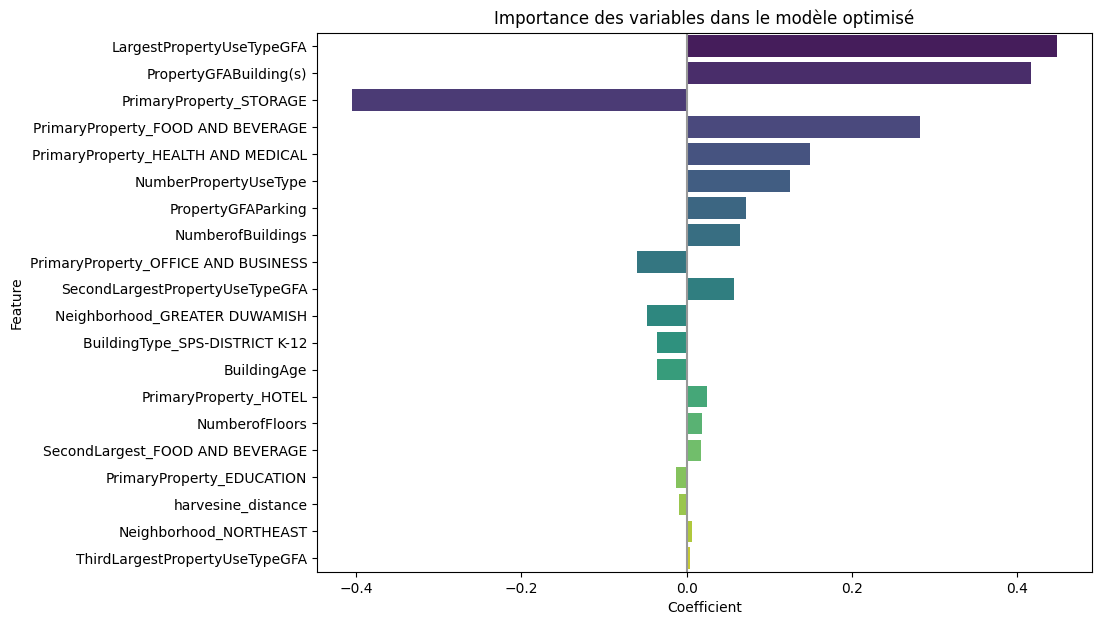

In [57]:
display_feature_importance(elastic_best_model, X)

### AVEC ENERGIESTARSCORE

In [58]:
El_pipe_est = Pipeline([
        ("preprocessor", full_pipeline_est),
        ('elasticnet', ElasticNet())

    ])

In [59]:
#Avec EnergieStarscore

performances_with, elastic_best_model_With,elastic_best_param_with,elastic_best_scores_with = optimize_and_evaluate(
    model=El_pipe_est,
    param_grid=param_grid,
    X_train=X_est_train,
    y_train=y_est_train,
    X_test=X_est_test,
    y_test=y_est_test,
    metrics=METRICS
)
performances_with
elastic_best_scores_with

Fitting 5 folds for each of 162 candidates, totalling 810 fits


np.float64(0.7923867963048303)

#### Most importants features

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22892\1518511691.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_df_sorted, palette='viridis')


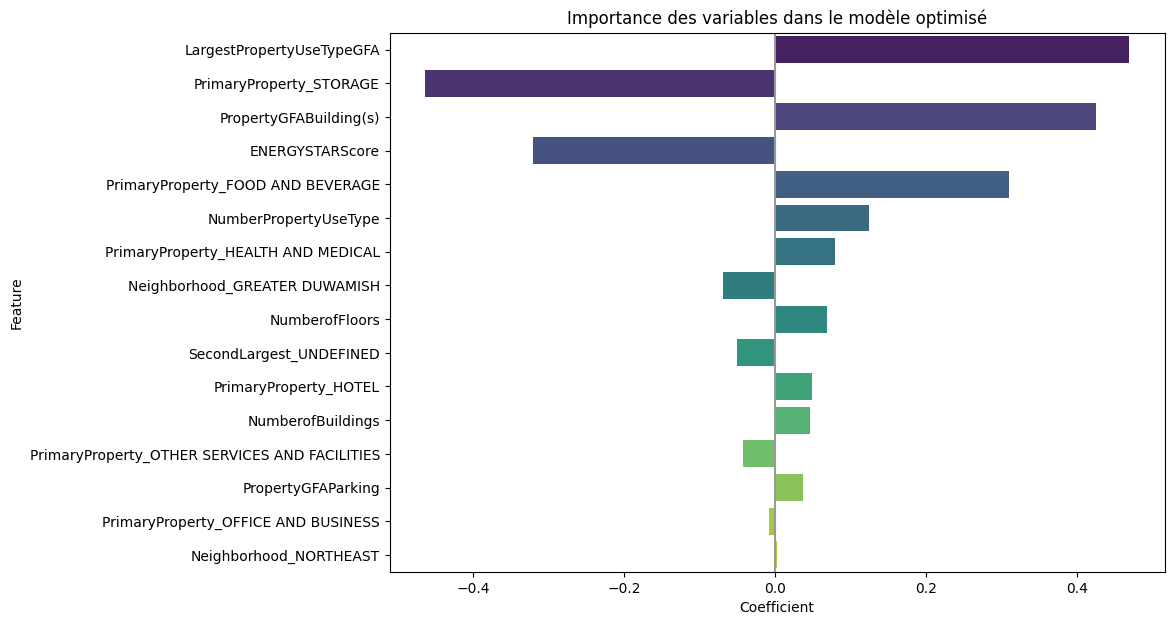

In [60]:
display_feature_importance(elastic_best_model_With, X_est)

On remarque que les variables les plus importantes du modèles ElasticNet optimisé sont:
`LargestPropertyUseTypeGFA`,`PrimaryProperty`,`PropertyGFABuilding`,`NumberPropertyUseType`,`NumberofBuildings`,`SecondLargestPropertyUseTypeGFA`,`BuildingType`,`BuildingAge` et `ENERGIESTARScore`

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 17px; color: RGB(51,165,182); ">5-DecisionTreeRegressor</h3>
</div>

### Définition de Pipeline de DecisonTree

In [61]:
set_config(display="diagram", print_changed_only=True)
# Sans Energy star score
dt_pipe = define_pipeline(DecisionTreeRegressor())
# Avec
dt_pipe_est = define_pipeline(DecisionTreeRegressor(), energyscore = True)
dt_pipe_est

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D2F5D65D0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NotApplicable',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D4FEF5B50>)])),
                ('regressor', DecisionTreeRegressor())])

# Sans validation croisée

In [62]:
# Train linear model sans energyscore
lr_results = train_model(model=dt_pipe,
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)

lr_pipe = lr_results["estimator"]

Model error: 0.8374


In [63]:
# Train linear model avec energyscore
lr_results_est = train_model(model=dt_pipe_est,
                       x_train=X_est_train, y_train=y_est_train,
                       x_test=X_est_test, y_test=y_est_test)

lr_pipe_est = lr_results_est["estimator"]

Model error: 0.37742


In [64]:
# Appel de la fonction de comparaison
comparison_df = compare_all_performances(
    train_test_data_1={"train": (y_train, lr_pipe.predict(X_train)),
                       "test": (y_test, lr_pipe.predict(X_test))},
    train_test_data_2={"train": (y_est_train, lr_pipe_est.predict(X_est_train)),
                       "test": (y_est_test, lr_pipe_est.predict(X_est_test))},
    metrics=METRICS,
    labels=("Sans_EnergyStarScore", "Avec_EnergyStarScore")
)

comparison_df

,metric,train_Sans_EnergyStarScore,test_Sans_EnergyStarScore,train_Avec_EnergyStarScore,test_Avec_EnergyStarScore
0,r2_score,1.0,0.493435,1.0,0.776116
1,mean_squared_error,0.0,0.837397,0.0,0.377425
2,mean_absolute_percentage_error,0.0,0.047057,0.0,0.031508
3,max_error,0.0,2.907123,0.0,1.936413


`Sur-apprentissage`
L’ajout de la variable `EnergyStarScore` améliore nettement les performances du modèle sur les données de test, mais le sur-apprentissage reste un problème majeur.

#  AVEC VALIDATION CROISEE ET OPTIMISATION DES HYPERPARAMTRES

### SANS ENERGIESTARScore

In [65]:
param_grid = {
    'dtregressor__max_depth': [None, 5, 10, 15],
    'dtregressor__min_samples_split': [2, 5, 10],
    'dtregressor__min_samples_leaf': [1, 2, 4],
    'dtregressor__max_features': [None, 'sqrt', 'log2', 10, 20],
    'dtregressor__ccp_alpha': [0.0, 0.1, 0.2]
}

In [66]:
dtr_pipe = Pipeline([
        ("preprocessor", full_pipeline),
        ('dtregressor', DecisionTreeRegressor())

    ])

In [67]:
#Sans ENERGIESTARSCore

performances, dt_best_model,dt_best_param,dt_best_scores = optimize_and_evaluate(
    model=dtr_pipe,
    param_grid=param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    metrics=METRICS
)
performances

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


,metric,train,test
0,r2_score,0.721635,0.662470
1,mean_squared_error,0.494524,0.557967
2,mean_absolute_percentage_error,0.036933,0.038674
3,max_error,3.368013,2.649159


On note une nette amelioration du score du test avec l'optimisation des hyperparametres. On constate également que les erreurs sont moindres à l'entrainement qu'au Test. Le risque de surapprentissage persiste

### AVEC ENERGIESTARScore

In [68]:
dtr_pipe_est = Pipeline([
        ("preprocessor", full_pipeline_est),
        ('dtregressor', DecisionTreeRegressor())

    ])

In [69]:
#Avec EnergieStarscore

performances_with, dt_best_model_with,dt_best_param_with,dt_best_scores_with = optimize_and_evaluate(
    model=dtr_pipe_est,
    param_grid=param_grid,
    X_train=X_est_train,
    y_train=y_est_train,
    X_test=X_est_test,
    y_test=y_est_test,
    metrics=METRICS
)
performances_with

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,metric,train,test
0,r2_score,0.927116,0.806271
1,mean_squared_error,0.118863,0.326590
2,mean_absolute_percentage_error,0.016273,0.029012
3,max_error,2.325366,1.866276


Les métriques de performance indiquent que le modèle performe mieux sur l'ensemble d'entraînement que sur l'ensemble de test.Le modèle est plus performant avec l'optimisation des hyperparamètres et l'ajout de la variable ENERGIESTARScore

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 17px; color: RGB(51,165,182); ">6-RandomForest</h3>
</div>

### Définition de Pipeline de RandomForest

In [70]:
set_config(display="diagram", print_changed_only=True)
# Sans Energy star score
rf_pipe = define_pipeline(RandomForestRegressor())
# Avec
rf_pipe_est = define_pipeline(RandomForestRegressor(), energyscore = True)
rf_pipe_est

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D2F5D65D0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NotApplicable',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D4FEF5B50>)])),
                ('regressor', RandomForestRegressor())])

# Sans validation croisée

In [71]:
# Train linear model sans energyscore
lr_results = train_model(model=rf_pipe,
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)

lr_pipe = lr_results["estimator"]

Model error: 0.47286


In [72]:
# Train linear model avec energyscore
lr_results_est = train_model(model=rf_pipe_est,
                       x_train=X_est_train, y_train=y_est_train,
                       x_test=X_est_test, y_test=y_est_test)

lr_pipe_est = lr_results_est["estimator"]

Model error: 0.20189


In [73]:
# Appel de la fonction de comparaison
comparison_df = compare_all_performances(
    train_test_data_1={"train": (y_train, lr_pipe.predict(X_train)),
                       "test": (y_test, lr_pipe.predict(X_test))},
    train_test_data_2={"train": (y_est_train, lr_pipe_est.predict(X_est_train)),
                       "test": (y_est_test, lr_pipe_est.predict(X_est_test))},
    metrics=METRICS,
    labels=("Sans_EnergyStarScore", "Avec_EnergyStarScore")
)

comparison_df

,metric,train_Sans_EnergyStarScore,test_Sans_EnergyStarScore,train_Avec_EnergyStarScore,test_Avec_EnergyStarScore
0,r2_score,0.956431,0.713955,0.979349,0.880243
1,mean_squared_error,0.077401,0.472858,0.033679,0.201888
2,mean_absolute_percentage_error,0.013776,0.035290,0.008451,0.022062
3,max_error,1.724996,2.511845,1.345125,1.904058


L'ajout de la variable `EnergyStarScore` améliore significativement les performances du modèle RandomForestRegressor, et le modèle semble bien généraliser aux données de test sans souffrir de surapprentissage

#  AVEC VALIDATION CROISEE ET OPTIMISATION DES HYPERPARAMTRES

### SANS ENERGIESTARScore

In [74]:
param_grid = {
    'rfregressor__n_estimators': [100,200, 300],
    'rfregressor__max_depth': [None, 10, 20,30],
    'rfregressor__min_samples_split': [2,5, 10],
    'rfregressor__ccp_alpha': [0.0, 0.1, 0.2]
    
}


In [75]:
rfr_pipe = Pipeline([
        ("preprocessor", full_pipeline),
        ('rfregressor', RandomForestRegressor())

    ])

In [76]:
#Sans ENERGIESTARSCore

performances, random_best_model,random_best_param,random_best_scores = optimize_and_evaluate(
    model=rfr_pipe,
    param_grid=param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    metrics=METRICS
)
performances
random_best_scores

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


np.float64(0.6843482460816144)

Pas de différences significatives des scores et erreurs sur le test avec l'optimisation des hyperparametres

### AVEC ENERGIESTARScore

In [77]:
rfr_pipe_est = Pipeline([
        ("preprocessor", full_pipeline_est),
        ('rfregressor', RandomForestRegressor())

    ])

In [78]:
#Avec EnergieStarscore

performances_with, random_best_model_with,random_best_param_with,random_best_scores_with = optimize_and_evaluate(
    model=rfr_pipe_est,
    param_grid=param_grid,
    X_train=X_est_train,
    y_train=y_est_train,
    X_test=X_est_test,
    y_test=y_est_test,
    metrics=METRICS
)
performances_with
random_best_scores_with

Fitting 5 folds for each of 108 candidates, totalling 540 fits


np.float64(0.8365870357407985)

Les performances du modèle avec et sans optimisation des hyperparamètres sont très proches, indiquant que l'optimisation des hyperparamètres n'apporte pas d'amélioration significative dans ce cas.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 17px; color: RGB(51,165,182); ">7-XGBOOST</h3>
</div>

In [79]:
#pip install xgboost

In [80]:
from xgboost import XGBRegressor

### Définition de Pipeline de XGBRegressor

In [81]:
set_config(display="diagram", print_changed_only=True)
# Sans Energy star score
xg_pipe = define_pipeline(XGBRegressor())
# Avec
xg_pipe_est = define_pipeline(XGBRegressor(), energyscore = True)
xg_pipe_est

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D2F5D65D0>),
                                                 ('cat',
                                                  Pipeline(steps=[('i...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

# Sans validation croisée

In [82]:
# Train linear model sans energyscore
lr_results = train_model(model=xg_pipe,
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)

lr_pipe = lr_results["estimator"]

Model error: 0.55056


In [83]:
# Train linear model avec energyscore
lr_results_est = train_model(model=xg_pipe_est,
                       x_train=X_est_train, y_train=y_est_train,
                       x_test=X_est_test, y_test=y_est_test)

lr_pipe_est = lr_results_est["estimator"]

Model error: 0.25806


In [84]:
# Appel de la fonction de comparaison
comparison_df = compare_all_performances(
    train_test_data_1={"train": (y_train, lr_pipe.predict(X_train)),
                       "test": (y_test, lr_pipe.predict(X_test))},
    train_test_data_2={"train": (y_est_train, lr_pipe_est.predict(X_est_train)),
                       "test": (y_est_test, lr_pipe_est.predict(X_est_test))},
    metrics=METRICS,
    labels=("Sans_EnergyStarScore", "Avec_EnergyStarScore")
)

comparison_df

,metric,train_Sans_EnergyStarScore,test_Sans_EnergyStarScore,train_Avec_EnergyStarScore,test_Avec_EnergyStarScore
0,r2_score,0.994841,0.666950,0.999257,0.846919
1,mean_squared_error,0.009166,0.550561,0.001211,0.258065
2,mean_absolute_percentage_error,0.004510,0.037725,0.001606,0.024926
3,max_error,0.461915,3.371703,0.201791,2.177351


Le modèle `XGBoost` présente un fort `sur-apprentissage`, mais l’ajout de `EnergyStarScore` améliore significativement les performances sur les données de test ; il est nécessaire d’optimiser les hyperparamètres pour mieux généraliser.

#  AVEC VALIDATION CROISEE ET OPTIMISATION DES HYPERPARAMTRES

### SANS ENERGIESTARScore

In [85]:
param_grid = {
    'xgregressor__n_estimators': [100, 200, 300],
    'xgregressor__max_depth': [3, 5, 7],
    'xgregressor__learning_rate': [0.01, 0.05, 0.1],
    'xgregressor__min_child_weight': [1, 3, 5],
    'xgregressor__gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'xgregressor__lambda': [1, 1.5, 2, 3],
    'xgregressor__alpha': [0, 0.1, 0.2, 0.3]
}


In [86]:
xgb_pipe = Pipeline([
        ("preprocessor", full_pipeline),
        ('xgregressor', XGBRegressor())

    ])

In [87]:
#Sans ENERGIESTARSCore

performances, xgboost_best_model,xgboost_best_param,xgboost_best_scores = optimize_and_evaluate(
    model=xgb_pipe,
    param_grid=param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    metrics=METRICS
)
performances


Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


,metric,train,test
0,r2_score,0.782156,0.731231
1,mean_squared_error,0.387006,0.444299
2,mean_absolute_percentage_error,0.030961,0.033832
3,max_error,3.337076,2.470648


### AVEC ENERGIESTARScore

In [88]:
xgb_pipe_est = Pipeline([
        ("preprocessor", full_pipeline_est),
        ('xgregressor', XGBRegressor())

    ])

In [89]:
#Avec EnergieStarscore

performances_with, xgboost_best_model_with,xgboost_best_param_with,xgboost_best_scores_with = optimize_and_evaluate(
    model=xgb_pipe_est,
    param_grid=param_grid,
    X_train=X_est_train,
    y_train=y_est_train,
    X_test=X_est_test,
    y_test=y_est_test,
    metrics=METRICS
)
performances_with


Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


,metric,train,test
0,r2_score,0.957130,0.868367
1,mean_squared_error,0.069914,0.221907
2,mean_absolute_percentage_error,0.012998,0.022901
3,max_error,1.997635,2.052869


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 17px; color: RGB(51,165,182); ">8-Support Vector Regressor</h3>
</div>

### Définition de Pipeline de Support Vector Regressor


In [90]:
set_config(display="diagram", print_changed_only=True)
# Sans Energy star score
svr_pipe = define_pipeline(SVR())
# Avec
svr_pipe_est = define_pipeline(SVR(), energyscore = True)
svr_pipe_est

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D2F5D65D0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NotApplicable',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D4FEF5B50>)])),
                ('regressor', SVR())])

# Sans validation croisée

In [91]:
# Train linear model sans energyscore
lr_results = train_model(model=svr_pipe,
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)

lr_pipe = lr_results["estimator"]

Model error: 0.45008


In [92]:
# Train linear model avec energyscore
lr_results_est = train_model(model=svr_pipe_est,
                       x_train=X_est_train, y_train=y_est_train,
                       x_test=X_est_test, y_test=y_est_test)

lr_pipe_est = lr_results_est["estimator"]

Model error: 0.30188


In [93]:
# Appel de la fonction de comparaison
comparison_df = compare_all_performances(
    train_test_data_1={"train": (y_train, lr_pipe.predict(X_train)),
                       "test": (y_test, lr_pipe.predict(X_test))},
    train_test_data_2={"train": (y_est_train, lr_pipe_est.predict(X_est_train)),
                       "test": (y_est_test, lr_pipe_est.predict(X_est_test))},
    metrics=METRICS,
    labels=("Sans_EnergyStarScore", "Avec_EnergyStarScore")
)

comparison_df

,metric,train_Sans_EnergyStarScore,test_Sans_EnergyStarScore,train_Avec_EnergyStarScore,test_Avec_EnergyStarScore
0,r2_score,0.768453,0.727734,0.884453,0.820929
1,mean_squared_error,0.411351,0.450080,0.188439,0.301880
2,mean_absolute_percentage_error,0.029050,0.033984,0.018261,0.025016
3,max_error,4.011968,2.603964,3.297346,2.828166


#  AVEC VALIDATION CROISEE ET OPTIMISATION DES HYPERPARAMTRES

### SANS ENERGIESTARScore

In [94]:
# Définir la grille des paramètres à rechercher
param_grid = {
    'svregressor__kernel': ['linear', 'poly', 'rbf'],
    'svregressor__C': [0.1, 1, 10,100],
    'svregressor__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1.0],
    'svregressor__degree': [2, 3, 4, 5]
}




In [95]:
sv_pipe = Pipeline([
        ("preprocessor", full_pipeline),
        ('svregressor', SVR())

    ])

In [96]:
#Sans ENERGIESTARSCore

performances, svr_best_model,svr_best_param,svr_best_scores = optimize_and_evaluate(
    model=sv_pipe,
    param_grid=param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    metrics=METRICS
)
performances
svr_best_scores

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


np.float64(0.6836046317837872)

### AVEC ENERGIESTARScore

In [97]:
sv_pipe_est = Pipeline([
        ("preprocessor", full_pipeline_est),
        ('svregressor', SVR())

    ])

In [98]:
#Avec EnergieStarscore

performances_with, svr_best_model_with,svr_best_param_with,svr_best_scores_with = optimize_and_evaluate(
    model=sv_pipe_est,
    param_grid=param_grid,
    X_train=X_est_train,
    y_train=y_est_train,
    X_test=X_est_test,
    y_test=y_est_test,
    metrics=METRICS
)
performances_with
svr_best_scores_with

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


np.float64(0.85024247425226)

<h3 style="text-align:justify;color:yellow;font-size:26px;font-family:Georgia">D. Comparaison des modèles</h3> 

#### SANS ENERGYSTORESCORE

In [101]:
models = [svr_best_model, xgboost_best_model, random_best_model, lr_pipe,pipe_lasso,pipe_ridge, elastic_best_model, dt_best_model]
model_names = ['SVR', 'XGBoost', 'Random Forest', 'Linear Regression', 'Lasso','Ridge' ,'ElasticNet', 'Decision Tree']
for model, model_name in zip(models, model_names):
    print("Model:", model_name)
    print(get_all_performances(value_train=(y_train, model.predict(X_train)),
                                values_test=(y_test, model.predict(X_test)),
                                metrics=METRICS))
    print("\n")

Model: SVR
                           metric     train      test
0                        r2_score  0.717094  0.733338
1              mean_squared_error  0.502592  0.440815
2  mean_absolute_percentage_error  0.034525  0.033520
3                       max_error  4.339923  2.640617


Model: XGBoost
                           metric     train      test
0                        r2_score  0.782156  0.731231
1              mean_squared_error  0.387006  0.444299
2  mean_absolute_percentage_error  0.030961  0.033832
3                       max_error  3.337076  2.470648


Model: Random Forest
                           metric     train      test
0                        r2_score  0.898997  0.718235
1              mean_squared_error  0.179435  0.465782
2  mean_absolute_percentage_error  0.022043  0.034650
3                       max_error  1.806978  2.511719


Model: Linear Regression
                           metric     train      test
0                        r2_score  0.768453  0.727734
1   

| **Modèle**           | **R² (test)** | **MSE (test)** | **MAPE (test)** | **Max Error (test)** |
|-----------------------|---------------|----------------|-----------------|----------------------|
| **SVR**              | 0.733338      | 0.440815       | 0.033520        | 2.640617            |
| **XGBoost**          | 0.731231      | 0.444299       | 0.033832        | 2.470648            |
| **Random Forest**     | 0.718235      | 0.465782       | 0.034650        | 2.511719            |
| **Linear Regression** | 0.727734      | 0.450080       | 0.033984        | 2.603964            |
| **Lasso**            | -0.000633     | 1.654136       | 0.069566        | 3.875485            |
| **Ridge**            | 0.722682      | 0.458431       | 0.035050        | 2.556929            |
| **ElasticNet**       | 0.684830      | 0.521004       | 0.036789        | 2.599934            |
| **Decision Tree**     | 0.662470      | 0.557967       | 0.038674        | 2.649159            |


Le meilleur modèle est `SVR`, car il offre le meilleur compromis entre précision globale (r2_score, MAPE) et erreurs raisonnablement maîtrisées. Toutefois, `XGBoost` est également très performant.

Pour des raisons de temps d'execution nous allons utiliser le XGBoost qui prend moins de temps que le SVR

### Importances des variables

                                          Feature  Importance
4                          PropertyGFABuilding(s)    0.343323
5                       LargestPropertyUseTypeGFA    0.083498
35                        PrimaryProperty_STORAGE    0.075816
27              PrimaryProperty_FOOD AND BEVERAGE    0.067715
47                        SecondLargest_UNDEFINED    0.058731
3                              PropertyGFAParking    0.052644
7                  ThirdLargestPropertyUseTypeGFA    0.033038
6                 SecondLargestPropertyUseTypeGFA    0.028601
28             PrimaryProperty_HEALTH AND MEDICAL    0.026716
12                 BuildingType_SPS-DISTRICT K-12    0.023156
18                  Neighborhood_GREATER DUWAMISH    0.019077
10                            BuildingType_CAMPUS    0.015065
31            PrimaryProperty_OFFICE AND BUSINESS    0.013376
32  PrimaryProperty_OTHER SERVICES AND FACILITIES    0.012198
0                                     BuildingAge    0.011141
1       

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22892\287042043.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_sorted, palette='viridis')


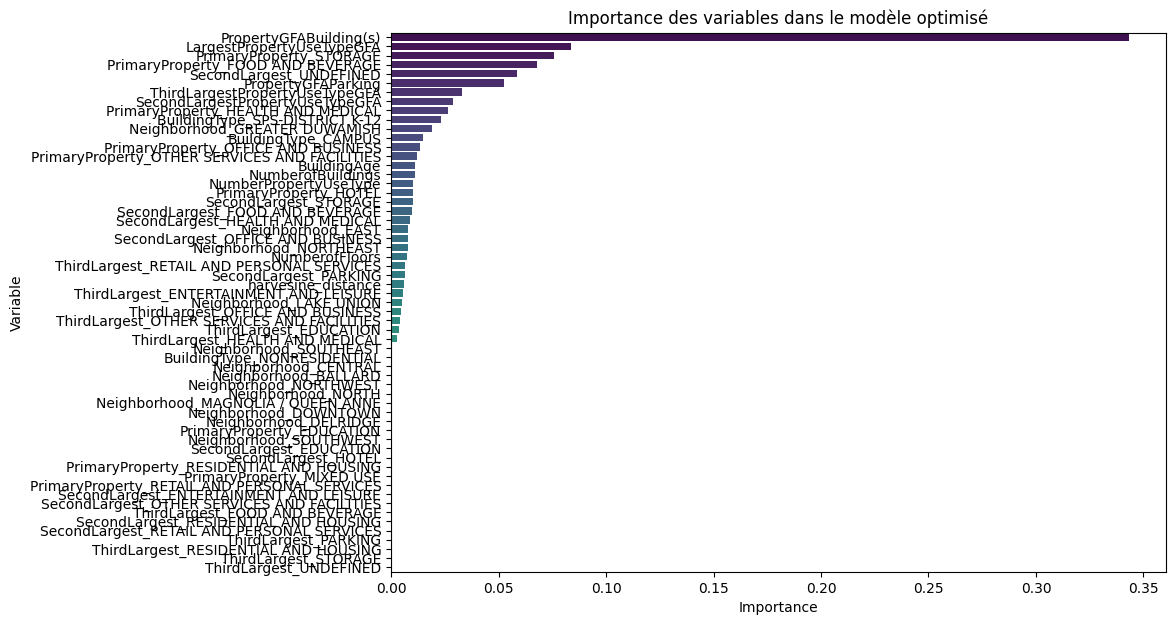

In [102]:
display_feature_importance_2(xgboost_best_model,X)

In [106]:

scores = []
for i in range(1, X_train.shape[1] + 1):
        selected_features = X_train.columns[:i]
        score = cross_val_score(xgboost_best_model, X_train[selected_features], y_train, cv=5, scoring='r2').mean()
        scores.append((i, score))

    # Find the optimal number of features
best_n_features = max(scores, key=lambda x: x[1])[0]
selected_features = X_train.columns[:best_n_features]
print("Best number of features:", best_n_features)
print("Selected Features:", selected_features)


Best number of features: 13
Selected Features: Index(['BuildingType', 'Neighborhood', 'BuildingAge', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'PrimaryProperty', 'LargestPropertyUseTypeGFA', 'SecondLargest',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargest',
       'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')


Les variables les plus importantes sont : `BuildingType`  , `Neighborhood`, `PrimaryProperty`, `SecondLargest`,
       `ThirdLargest`, `NumberofBuildings`, `NumberofFloors`,
       `PropertyGFAParking`, `PropertyGFABuilding(s)`,
       `LargestPropertyUseTypeGFA`, `SecondLargestPropertyUseTypeGFA`,
       `ThirdLargestPropertyUseTypeGFA`, `NumberPropertyUseType`


Entrainenment et validation avec les variables les plus importantes

In [107]:
important_features=selected_features
# Sélectionner uniquement les variables les plus importantes
X_important = X[important_features]
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.30, random_state=42)
y_train, y_test = np.log1p(y_train), np.log1p(y_test)

In [108]:
param_grid = {
    'xgregressor__n_estimators': [100, 200, 300],
    'xgregressor__max_depth': [3, 5, 7],
    'xgregressor__learning_rate': [0.01, 0.05, 0.1],
    'xgregressor__min_child_weight': [1, 3, 5],
    'xgregressor__gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'xgregressor__lambda': [1, 1.5, 2, 3],
    'xgregressor__alpha': [0, 0.1, 0.2, 0.3]
}


In [109]:
performances, xgboost_best_model_1,xgboost_best_param_1,xgboost_best_scores_1 = optimize_and_evaluate(
    model=xgb_pipe,
    param_grid=param_grid,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    metrics=METRICS
)
performances

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


,metric,train,test
0,r2_score,0.855900,0.726082
1,mean_squared_error,0.255999,0.452811
2,mean_absolute_percentage_error,0.025418,0.034277
3,max_error,2.366295,2.429867


# Enregistrement des deux modèles

Modèle SVR

In [93]:
import pickle

# Sauvegarder le modèle dans un fichier
#with open('svr_model.pkl', 'wb') as file:
#    pickle.dump(svr_best_model, file)
    

Modèle XGBOOST

In [110]:
import pickle

# Sauvegarder le modèle dans un fichier
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgboost_best_model_1, file)
    

#### AVEC ENERGYSTORESCORE

In [100]:
models = [svr_best_model_with, xgboost_best_model_with, random_best_model_with, lr_pipe_est,pipe_lasso_est,pipe_ridge_est, elastic_best_model_With, dt_best_model_with]
model_names = ['SVR', 'XGBoost', 'Random Forest', 'Linear Regression', 'Lasso','Ridge' ,'ElasticNet', 'Decision Tree']

for model, model_name in zip(models, model_names):
    print("Model:", model_name)
    print(get_all_performances(value_train=(y_est_train, model.predict(X_est_train)),
                                values_test=(y_est_test, model.predict(X_est_test)),
                                metrics=METRICS))
    print("\n")

Model: SVR
                           metric     train      test
0                        r2_score  0.898089  0.860616
1              mean_squared_error  0.166203  0.234975
2  mean_absolute_percentage_error  0.017577  0.023276
3                       max_error  3.314517  2.301163


Model: XGBoost
                           metric     train      test
0                        r2_score  0.957130  0.868367
1              mean_squared_error  0.069914  0.221907
2  mean_absolute_percentage_error  0.012998  0.022901
3                       max_error  1.997635  2.052869


Model: Random Forest
                           metric     train      test
0                        r2_score  0.979598  0.878172
1              mean_squared_error  0.033272  0.205378
2  mean_absolute_percentage_error  0.008398  0.022188
3                       max_error  1.132148  1.939999


Model: Linear Regression
                           metric     train      test
0                        r2_score  0.884453  0.820929
1   

| **Modèle**           | **R²**    | **MSE**     | **MAPE**   | **Max Error** |
|-----------------------|-----------|-------------|------------|---------------|
| **SVR**              | 0.860616  | 0.234975    | 0.023276   | 2.301163      |
| **XGBoost**          | 0.868367  | 0.221907    | 0.022901   | 2.052869      |
| **Random Forest**     | 0.878172  | 0.205378    | 0.022188   | 1.939999      |
| **Linear Regression** | 0.820929  | 0.301880    | 0.025016   | 2.828166      |
| **Lasso**            | -0.000029 | 1.685856    | 0.068675   | 4.546330      |
| **Ridge**            | 0.840916  | 0.268185    | 0.025428   | 2.131380      |
| **ElasticNet**       | 0.805242  | 0.328325    | 0.027666   | 2.271183      |
| **Decision Tree**     | 0.806271  | 0.326590    | 0.029012   | 1.866276      |


`Random Forest` est le modèle le plus performant en termes de R², MSE, MAPE et Max Error sur l'ensemble de test.
XGBoost et ``SVR`` sont également de très bons modèles, mais `Random Forest` a un léger avantage sur toutes les métriques.
En résumé, `Random Forest` est le meilleur modèle parmi ceux évalués avec l'ajout de la variable EnergyStarScore.

### Importances des variables

                                          Feature  Importance
3                          PropertyGFABuilding(s)    0.390675
4                       LargestPropertyUseTypeGFA    0.298410
9                                 ENERGYSTARScore    0.113431
35                        PrimaryProperty_STORAGE    0.059060
27              PrimaryProperty_FOOD AND BEVERAGE    0.043408
8                              harvesine_distance    0.014187
1                                  NumberofFloors    0.012820
5                 SecondLargestPropertyUseTypeGFA    0.010232
32  PrimaryProperty_OTHER SERVICES AND FACILITIES    0.007862
2                              PropertyGFAParking    0.007710
7                           NumberPropertyUseType    0.005239
28             PrimaryProperty_HEALTH AND MEDICAL    0.003812
18                  Neighborhood_GREATER DUWAMISH    0.002878
6                  ThirdLargestPropertyUseTypeGFA    0.002824
31            PrimaryProperty_OFFICE AND BUSINESS    0.002543
22      

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22892\287042043.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_sorted, palette='viridis')


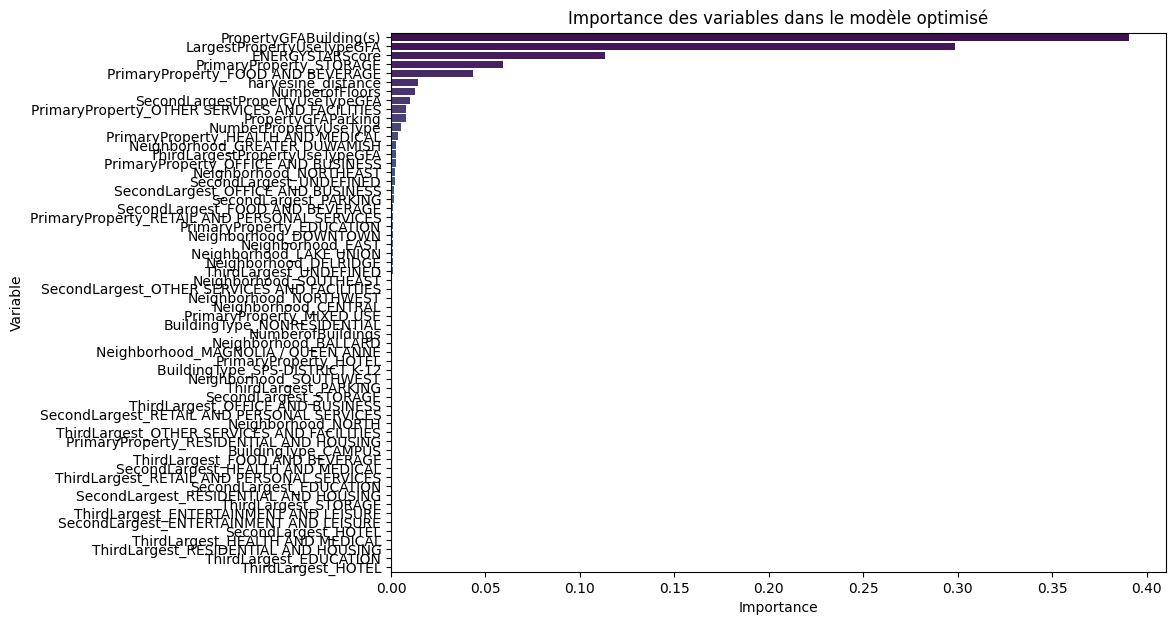

In [111]:
display_feature_importance_2(random_best_model_with,X_est)

In [113]:
scores = []
for i in range(1, X_est_train.shape[1] + 1):
        selected_features = X_est_train.columns[:i]
        score = cross_val_score(random_best_model_with, X_est_train[selected_features], y_est_train, cv=5, scoring='r2').mean()
        scores.append((i, score))

    # Find the optimal number of features
best_n_features = max(scores, key=lambda x: x[1])[0]
selected_features = X_est_train.columns[:best_n_features]
print("Best number of features:", best_n_features)
print("Selected Features:", selected_features)


Best number of features: 15
Selected Features: Index(['BuildingType', 'Neighborhood', 'PrimaryProperty', 'SecondLargest',
       'ThirdLargest', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'NumberPropertyUseType',
       'harvesine_distance', 'ENERGYSTARScore'],
      dtype='object')


Les variables les plus importantes sont : `BuildingType`  , `Neighborhood`, `PrimaryProperty`, `SecondLargest`,
       `ThirdLargest`, `NumberofBuildings`, `NumberofFloors`,
       `PropertyGFAParking`, `PropertyGFABuilding(s)`,
       `LargestPropertyUseTypeGFA`, `SecondLargestPropertyUseTypeGFA`,
       `ThirdLargestPropertyUseTypeGFA`, `NumberPropertyUseType`,
       `harvesine_distance`, `ENERGYSTARScore`


Entrainenment et validation avec les variables les plus importantes

In [114]:
important_features=selected_features
# Sélectionner uniquement les variables les plus importantes
X_important = X_est[important_features]
X_est_train, X_est_test, y_est_train, y_est_test = train_test_split(X_important, y_est, test_size=0.30, random_state=42)
y_est_train, y_est_test = np.log1p(y_est_train), np.log1p(y_est_test)

In [115]:
param_grid = {
    'rfregressor__n_estimators': [100,200, 300],
    'rfregressor__max_depth': [None, 10, 20,30],
    'rfregressor__min_samples_split': [2,5, 10],
    'rfregressor__ccp_alpha': [0.0, 0.1, 0.2]
    
}

In [116]:
performances_with, random_best_model_with_1,random_best_param_with_1,random_best_scores_with_1 = optimize_and_evaluate(
    model=rfr_pipe_est,
    param_grid=param_grid,
    X_train=X_est_train,
    y_train=y_est_train,
    X_test=X_est_test,
    y_test=y_est_test,
    metrics=METRICS
)
performances_with


Fitting 5 folds for each of 108 candidates, totalling 540 fits


np.float64(0.8365870357407985)

In [117]:
performances_with

,metric,train,test
0,r2_score,0.979214,0.879391
1,mean_squared_error,0.033899,0.203324
2,mean_absolute_percentage_error,0.008382,0.022146
3,max_error,1.330623,1.958333


## ENREGISTREMENT DU MEILLEUR MODELE : RANDOMFOREST REGRESSOR

In [118]:
import pickle

# Sauvegarder le modèle dans un fichier
with open('random_best_model.pkl', 'wb') as file:
    pickle.dump(random_best_model_with_1, file)
    